#1. 분류(Classification)
 - 분류(Classification)
  - 학습데이터로 주어진 데이터의 피처와 라벨 값(범주값)을 머신러닝 알고리즘으로 학습 / 모델에 새로운 피쳐(feature) 값이 주어지면 라벨 값(범주)를 예측
 - 다양한 분류 알고리즘이 있으며 많이 활용되고 있음

- 0. 선형모형
 - 로지스틱 회귀(Logistic Regression): 독립변수와 종속변수의 선형 관계성에 기반

- 1. Tree 기반 모형
 - 결정나무(Decision Tree): 타겟 변수 범주 분포의 균일함에 대한 규칙 기반
 - 랜덤 포레스트(Random Forest): Tree 모형들을 결합한 앙상블(Ensemble) 모형 중 배깅 모형

- 2. 확률과 거리 기반
 - 나이브 베이즈(Naive Bayes): 베이즈(Bayes) 통계 기반
 - KNN: 근접 거리를 기준으로 하는 근접 이웃 기반 (Nearest Neighbor)

- 3. 부스팅 모형
 - Adaboost: Tree 등 Weak Learner 모형들을 순차적으로 결합한 앙상블(Ensemble) 모형 중 부스팅
 - Gradient Boosting 등

- 4. 비선형 & 블랙박스 모형
 - 서포트 벡터 머신(Support Vector machine): 개별 클래스 간의 최대 분류 마진을 효과적으로 발견
 - 인공신경망: 은닉층을 통한 비선형 변환을 통한 분류



 # 1. Tree 기반 분류: DT와 Random Forest
 - DT: 비교적 쉽게 적용할 수 있는 모형
 - 데이터 스케일링 등 전처리의 영향이 상대적으로 적음
 - 과적합(Overfitting)의 발생

 - 결정 트리(Decision Tree, 의사결정트리, 의사결정나무 등): 분류(Classification)와 회귀(Regression) 모두 가능
- 예: 매, 펭귄, 돌고래, 곰 분류
<figure>
    <img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FwlH1u%2FbtqwWZI9Xen%2FkFJDjGSFJAPxhyatC3Xhs0%2Fimg.png' width=700 height=300>
</figure>

- Tree?
 - Binary Tree?
 - 특정 기준(질문)에 따라 데이터를 구분

<figure>
    <img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fdy5OwG%2FbtqDwdHofoT%2FNtDy9lqXkhWTRTwEz6txd0%2Fimg.png' width=700 height=300>
</figure>


- 타겟 변수 범주 분포의 불순도

<figure>
    <img src='https://blog.kakaocdn.net/dn/dhoo7N/btqDvzqEhPH/QdOsfkqc2hcwHISIh0peo1/img.png' width=700 height=300>
</figure>

 - A, B, C 중에서 균일한 정도는? 균일한 순서는? 분류모형과의 의미는?
 - 측정: 엔트로피를 이용한 정보 이득(Information Gain)지수와 지니계수, Chi-square 등등

- 불순도(Impurity)
 - 서로 다른 범주가 얼마나 혼재하는지를 측정


<figure>
    <img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FqLXhZ%2FbtqwWyZl6iV%2FUZnQbf9L5HAFzf6hFfxK71%2Fimg.png' width=400 height=300>
</figure>


 - 엔트로피(Entropy)와 정보이득(Information Gain): 불순도(Impurity)를 측정, 엔트로피가 높으면 불순도가 높음. 엔트로피가 1이면 불순도가 최대. 즉, 한 범주 안에 서로 다른 데이터가 정확히 반반 있음. 엔트로피가 0이면 불순도는 최소. 한 범주 안에 하나의 데이터만 있음. 정보 이득(Information Gain)은 엔트로피를 사용하여 측정, 1에서 엔트로피 지수를 뺀 값으로 1-엔트로피 지수. 정보이득이 높으면 분류가 잘 된 것으로 이해할 수 있음

 - 지니 계수(Gini Index): 불평등 지수를 나타내는 값으로 0이 가장 평등(균일)하고 1에 가까우면 불평등함(다양함). 지니 계수가 낮을수록 데이터 균일도가 높은 상태이므로, 계수가 낮은 feature의 rule을 찾음




#2. sklearn에서 DT의 주요 hyperparameter

1) max_depth
 - 트리의 최대 깊이를 규정
 - 과적합과 관련
 - defualt 는 None이며, 분류가 잘 이뤄질 때까지 깊이를 더해나가고 노드가 가지는 데이터 개수가 min_samples_split 보다 작아질 때까지 게속 깊이를 증가

2) max_features
 - 최적의 분할을 위해 고려할 최대 변수의 개수, 디폴트는 None으로 X변수들의 전체를 사용해 분류
 - int 형: 대상 피처의 개수, float 형: 전체 피처 중 대상 피처의 퍼센트임.
 - 'sqrt': 전체 피처 중 sqrt(전체 피처 개수) 즉 ${\sqrt {전체 피처}}$개수 지정
 - 'auto': sqrt와 동일
 - 'log': 전체 피처 중 log2(전체 피처 개수) 선정
 - 'None': 전체 피처 선정

3) min_samples_split
 - 노드를 분기가 일어나기 위한 최소한의 샘플 데이터 수(node내 observation의 수)로 과적합을 관리하는데 사용할 수 있음
 - 디폴트는 2, 작을 수록 과적합 가능성 증가

4) min_samples_leaf
 - Terminal 노드(leaf)가 되기 위한 최소한의 Obs.의 수
 - min_samples_split와 유사하게 과적합 관리에 활용
 - 불균형 타겟변수에 대한 분류 시 작은 값으로 설정

5) max_leaf_nodes
 - Leaf 최대 개수


**CART(Classification And Regression Tree)**
- 지니 지수(Gini Index) 또는 분산의 감소량을 사용하여 분류
- 범주형 변수에 대해서는 지니 계수
- 연속형 변수에 대해서는 분산의 감소량 사용

| 알고리즘 | 평가지수(선택방법) | 비고 |
|:---:|:----:|:----|
| ID3 | Entropy | 다지분리(범주) |
| C4.5 | Information Gain | 다지분리(범주) 및 이진분리(수치) |
| C5.0 | 카이제곱(범주), F검정(수치) | 통계적 접근 방식
| CART | Gini index(범주), 분산의 차이(수치) |통계적 접근 방식, 항상 2진 분리|



**가상의 데이터로 분류**

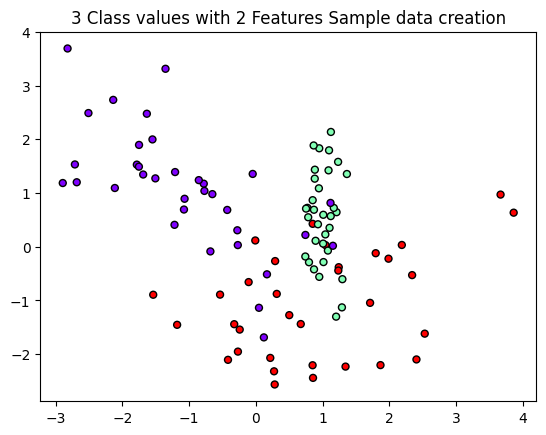

In [1]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해서 feature는 2개, 결정값 클래스는 3가지 유형의 classification 샘플 데이터 생성.
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                             n_classes=3, n_clusters_per_class=1,random_state=0)

# plot 형태로 2개의 feature로 2차원 좌표 시각화, 각 클래스값은 다른 색깔로 표시됨.
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, cmap='rainbow', edgecolor='k')

In [2]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()

    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()

    # 호출 파라미터로 들어온 training 데이타로 model 학습 .
    model.fit(X, y)

    # meshgrid 형태인 모든 좌표값으로 예측 수행.
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # contourf() 를 이용하여 class boundary 를 visualization 수행.
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

<ipython-input-2-1793848230>:24: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


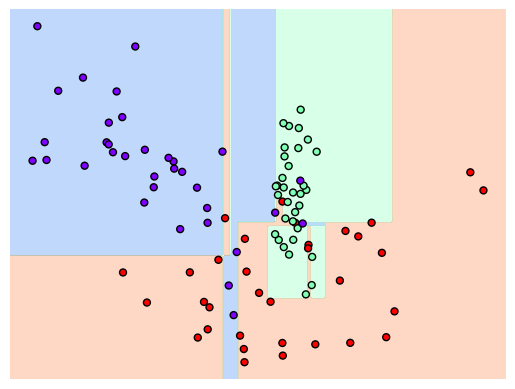

In [3]:
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약없는 결정 트리의 Decsion Boundary 시각화.
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

<ipython-input-2-1793848230>:24: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


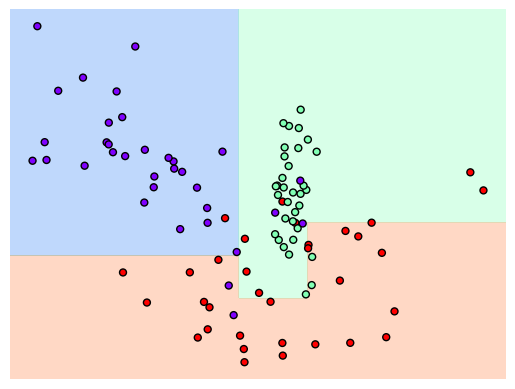

In [4]:
# 하이퍼파라미터를 변경하며 수행: 예) min_samples_leaf=6 으로 트리 생성 조건을 제약한 Decision Boundary 시각화
dt_clf = DecisionTreeClassifier( min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

- 예제 학습데이터 정의

In [5]:
import pandas as pd
import numpy as np
# 데이터 정의
data = pd.DataFrame({"no_insects":["True","True","True","False","True","True","True","True","True","False"],
                     "no_dead":["True","True","False","True","True","True","False","False","True","False"],
                     "no_wilting":["True","True","True","True","True","True","False","True","True","True"],
                     "no_diseases":["True","True","False","True","True","True","False","False","True","True"],
                     "tree_health":["Good","Good","Poor","Good","Good","Good","Poor","Poor","Good","Poor"]},
                    columns=["no_insects","no_dead","no_wilting","no_diseases","tree_health"])
# 기술 속성(descriptive features)
features = data[["no_insects","no_dead","no_wilting","no_diseases"]]
# 대상 속성(target feature)
target = data["tree_health"]
print(data)


  no_insects no_dead no_wilting no_diseases tree_health
0       True    True       True        True        Good
1       True    True       True        True        Good
2       True   False       True       False        Poor
3      False    True       True        True        Good
4       True    True       True        True        Good
5       True    True       True        True        Good
6       True   False      False       False        Poor
7       True   False       True       False        Poor
8       True    True       True        True        Good
9      False   False       True        True        Poor


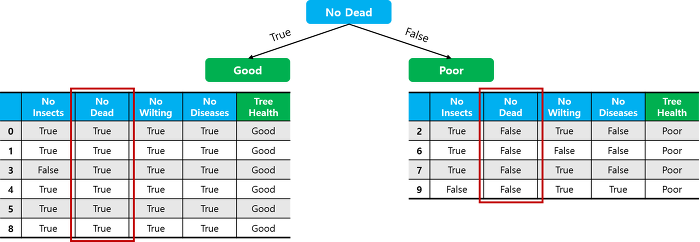

In [6]:
# 엔트로피
def entropy(target_col):
    elements, counts = np.unique(target_col, return_counts = True)
    entropy = -np.sum([(counts[i]/np.sum(counts))*np.log2(counts[i]/np.sum(counts)) for i in range(len(elements))])
    return entropy


[Source: statquest 영상]
- 정보 이득: 상위 노드의 엔트로피에서 하위 노드의 엔트로피를 뺀 값

image.png

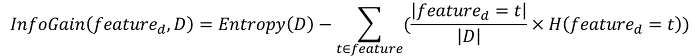

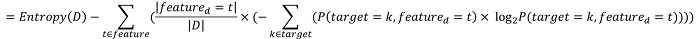

- No Insects 속성의 예

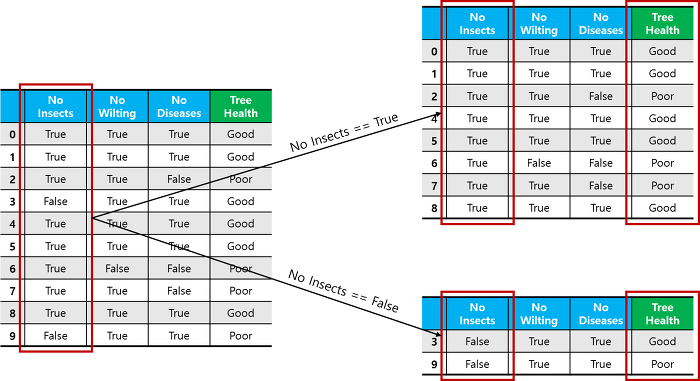

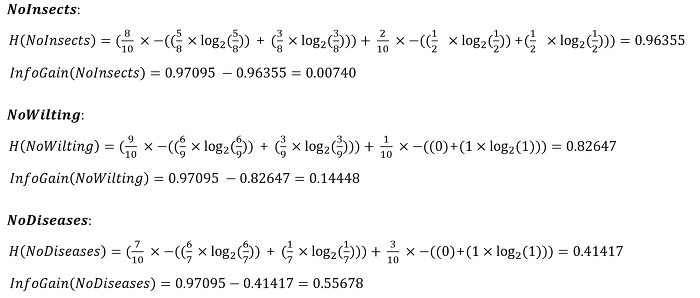

In [7]:
# 정보이득
def InfoGain(data,split_attribute_name,target_name):

    # 전체 엔트로피 계산
    total_entropy = entropy(data[target_name])
    print('Entropy(D) = ', round(total_entropy, 5))

    # 가중 엔트로피 계산
    vals,counts= np.unique(data[split_attribute_name],return_counts=True)
    Weighted_Entropy = np.sum([(counts[i]/np.sum(counts))*
                               entropy(data.where(data[split_attribute_name]==vals[i]).dropna()[target_name])
                               for i in range(len(vals))])
    print('H(', split_attribute_name, ') = ', round(Weighted_Entropy, 5))


    # 정보이득 계산
    Information_Gain = total_entropy - Weighted_Entropy
    return Information_Gain

print('InfoGain( no_insects ) = ', round(InfoGain(data, "no_insects", "tree_health"), 5), '\n')
print('InfoGain( no_wilting ) = ', round(InfoGain(data, "no_wilting", "tree_health"), 5), '\n')
print('InfoGain( no_diseases ) = ', round(InfoGain(data, "no_diseases", "tree_health"), 5))

Entropy(D) =  0.97095
H( no_insects ) =  0.96355
InfoGain( no_insects ) =  0.0074 

Entropy(D) =  0.97095
H( no_wilting ) =  0.82647
InfoGain( no_wilting ) =  0.14448 

Entropy(D) =  0.97095
H( no_diseases ) =  0.41417
InfoGain( no_diseases ) =  0.55678


[Source: statquest 영상]


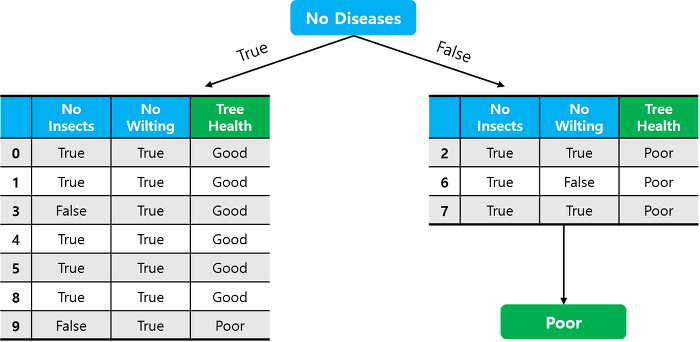

계산방식은 아래와 같음

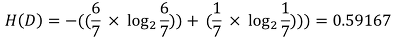

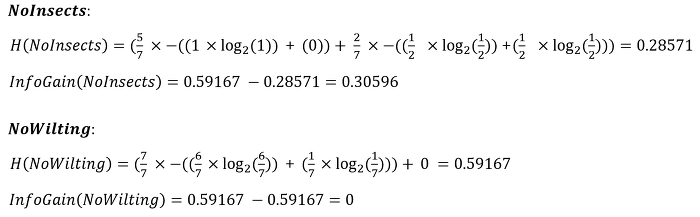

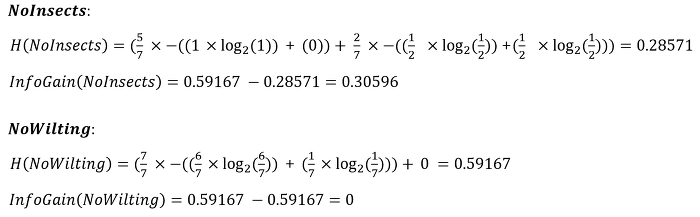

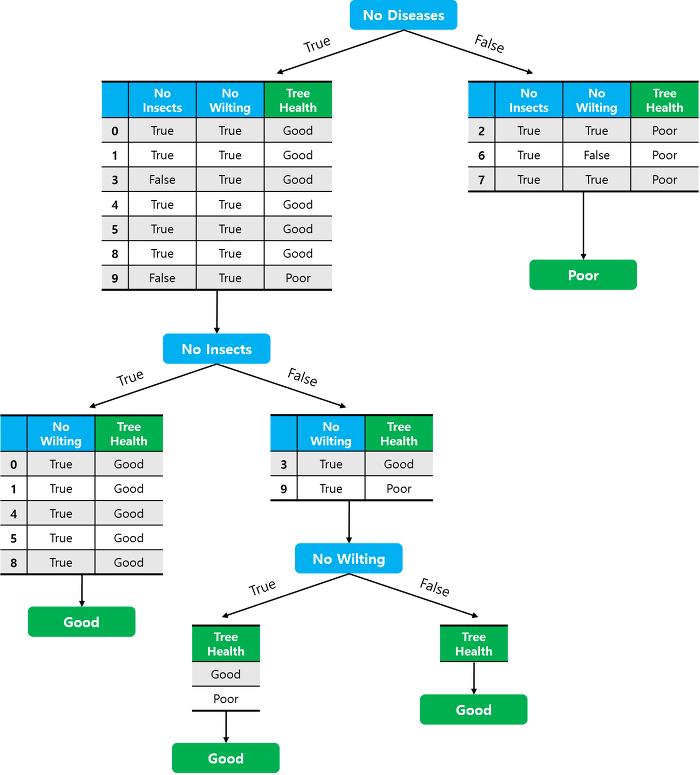

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

cat_cols = [c for c in features.columns if features[c].dtypes=='O']
num_cols = [c for c in features.columns if features[c].dtypes!='O']

cat_cols

['no_insects', 'no_dead', 'no_wilting', 'no_diseases']

In [9]:
features_enc = features

for i in cat_cols:
  features_enc[i] = LabelEncoder().fit_transform(features[i])

features_enc

dt = DecisionTreeClassifier()
dt.fit( features_enc, target)
dt.score(features_enc, target)
print( dt.tree_.children_left )
print( dt.tree_.children_right )

[ 1 -1 -1]
[ 2 -1 -1]


<ipython-input-9-2854133137>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_enc[i] = LabelEncoder().fit_transform(features[i])
<ipython-input-9-2854133137>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_enc[i] = LabelEncoder().fit_transform(features[i])
<ipython-input-9-2854133137>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

# 4. DT 시각화

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dt_clf = DecisionTreeClassifier(min_samples_leaf=6,random_state=156)

# iris 데이터
iris_data = load_iris()
X_train , X_test , y_train , y_test = train_test_split(iris_data.data, iris_data.target,
                                                       test_size=0.2,  random_state=11)

# 학습
dt_clf.fit(X_train , y_train)

DecisionTreeClassifier(min_samples_leaf=6, random_state=156)

In [11]:
from sklearn.tree import export_graphviz
# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names , \
feature_names = iris_data.feature_names, impurity=True, filled=True)

In [12]:
!pip install graphviz

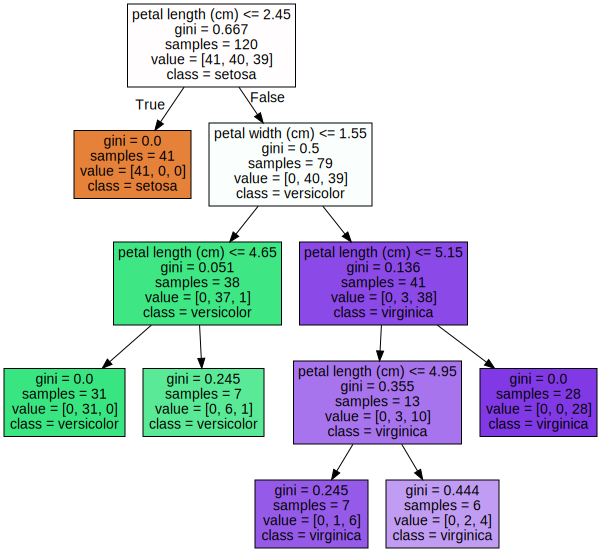

In [13]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

Feature importances:
[0.    0.    0.567 0.433]
sepal length (cm) : 0.000
sepal width (cm) : 0.000
petal length (cm) : 0.567
petal width (cm) : 0.433


<Axes: >

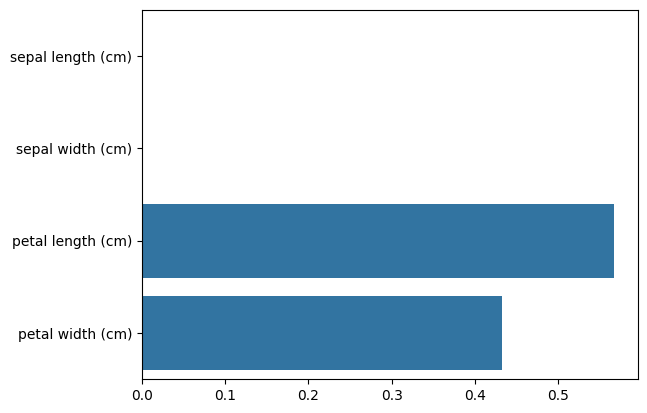

In [14]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names , dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화 하기
sns.barplot(x=dt_clf.feature_importances_ , y=iris_data.feature_names)

# 5. Decision Tree 연습

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42) # stratify : target
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


In [16]:
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_pred)))

Accuracy on training set: 1.000
Accuracy on test set: 1.000


In [17]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

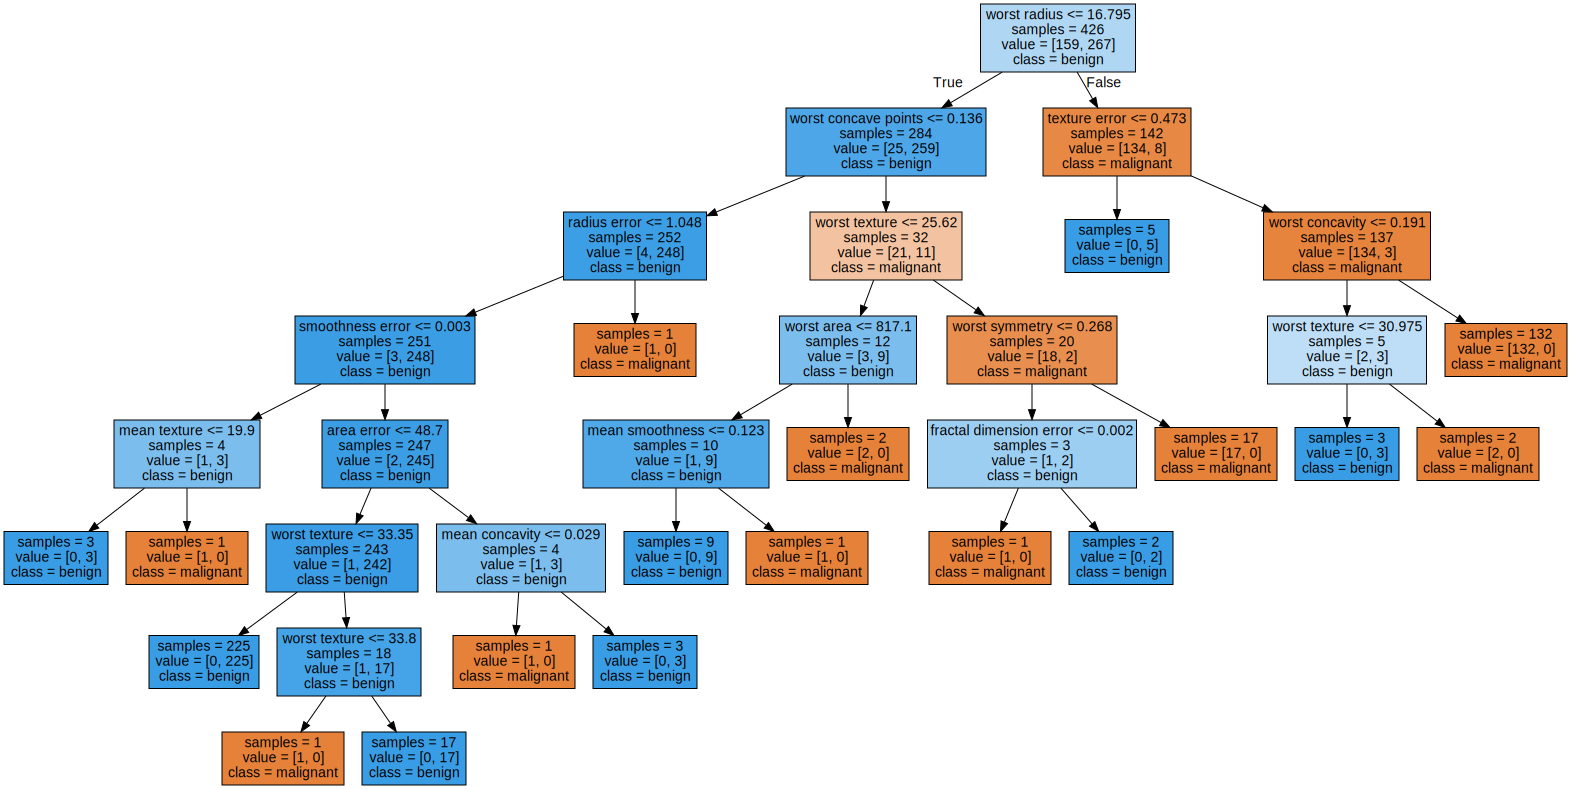

In [18]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

- Feature Importance in trees

In [19]:
print("Feature importances:")
print(tree.feature_importances_)

Feature importances:
[0.         0.00752597 0.         0.         0.00903116 0.
 0.00752597 0.         0.         0.         0.00975731 0.04630969
 0.         0.00238745 0.00231135 0.         0.         0.
 0.         0.00668975 0.69546322 0.05383211 0.         0.01354675
 0.         0.         0.01740312 0.11684357 0.01137258 0.        ]


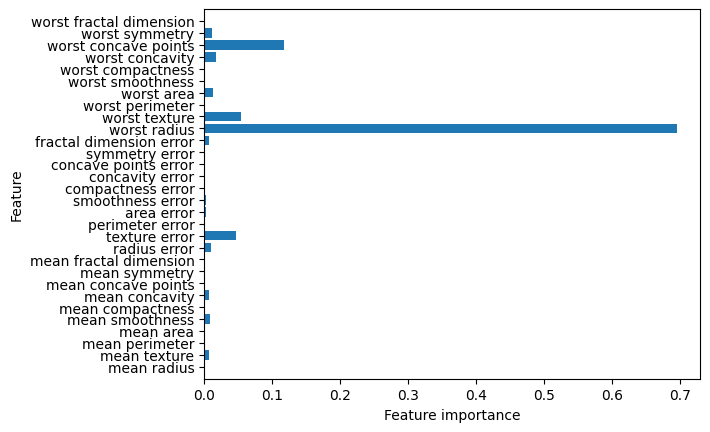

In [20]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

# 6. 랜덤 포레스트(Random Forest)

- DT를 기반으로, Ensemble 모형 중 Bagging을 적용

- 장점
1. 분류, 회귀에 사용
2. 좋은 성능과 빠른 계산
3. 대용량 데이터에서 활용, Feature가 많을 때도 잘 활용
- 단점
1. DT 개수 증가에 따른 계산 비용
2. 과적합

- 배깅(Bagging)
 - 중복을 허용한 리샘플링(resampling)을 부트스트래핑(boostraping)의 한 종류
 - 100개 데이터 중 75개 데이터를 학습할 경우, 배깅을 하면 복원추출을 통해서 여러 세트의 학습데이터(n=75)를 추출할 수 있음
 - 앙상블 모델은 결과들에 대한 편차가 크지 않고 안정적인 결과 제공
 - 학습데이터의 Bias를 해결은 못하지만, Unseen data에 대한 예측 시 좋은 성능, 노이즈 및 이상치에 대해서도 좋은 성능


<figure>
    <img src='https://miro.medium.com/max/1678/1*Wf91XObaX2zwow7mMwDmGw.png' width=700 height=300>
</figure>

출처 : https://eunsukimme.github.io/ml/2019/11/26/Random-Forest/

- Hyperparameter
 - n_estimators: 랜덤 포레스트 안의 결정 트리 갯수, 많으면 좋지만 계산 비용
 - max_features: 무작위로 선택할 Feature의 개수, Default는 10, max_features=n_features이면 30개의 feature 중 30개의 feature 모두를 선택해 결정 트리. bootstrap=True (default)이면 30개의 feature에서 복원 추출로 30개. max_features 값이 크면 랜덤 포레스트의 트리들이 비슷한 feature를 갖게 되어 가장 중요한 feature에 맞게 예측되며, max_features 값이 작다면 랜덤 포레스트의 트리들이 서로 다르며 과적합은 감소

 - max_depth : 트리의 깊이
 - min_samples_leaf : 리프노드가 되기 위한 최소한의 샘플 데이터 수
 - min_samples_split : 노드를 분할하기 위한 최소한의 데이터 수
 - max_leaf_nodes : 리프노드의 최대 개수




In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

x, y = make_moons(n_samples=100, noise=0.25, random_state=3) # noise: Standard deviation of Gaussian noise added to the data.
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=42)
forest = RandomForestClassifier(n_estimators=5, n_jobs=-1, random_state=42) # n_estimators: 사용할 tree수
forest.fit(x_train, y_train)
forest.score(x_train, y_train)
forest.predict(x_test)

array([1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1])

In [23]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    stratify=cancer.target, random_state=0)
n_feature = cancer.data.shape[1]

rf = RandomForestClassifier().fit(x_train, y_train)
rf.score( x_train,y_train)
rf.predict( x_test)

- 변수 중요도 시각화

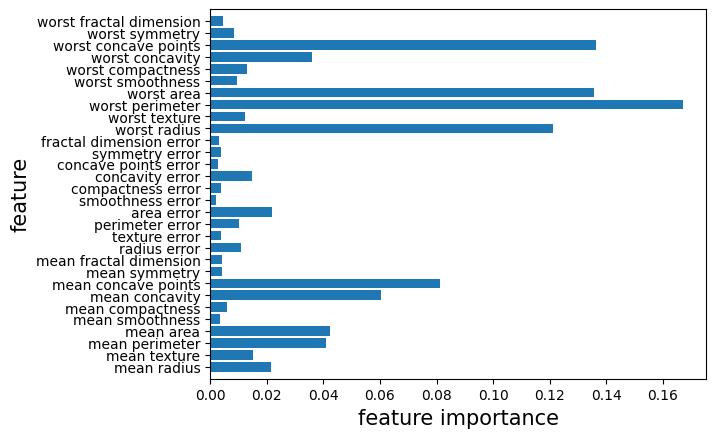

In [24]:
index = np.arange(n_feature)
forest = RandomForestClassifier(n_estimators=100, n_jobs=-1)
forest.fit(x_train, y_train)

import matplotlib.pyplot as plt
plt.barh(index, forest.feature_importances_, align='center')
plt.yticks(index, cancer.feature_names)
plt.ylim(-1, n_feature)
plt.xlabel('feature importance', size=15)
plt.ylabel('feature', size=15)
plt.show()

# 7.K-fold CV
- cross validation: 데이터셋을 k개의 subset으로 구분 후 k-1개의 subset을 train을 위해, 나머지 하나의 subset을 test를 위해 사용
  - 일반적으로 K=10을 사용하나, 데이터셋이 클 경우 계산 속도를 고려하여 k의 값을 줄이기도 함
  - 데이터셋이 많지 않을 경우 여러 번 샘플링하여 검증하는 과정을 거칠 수 있음
- cross validation을 사용할 경우 imbalanced data에 민감할 수 있음
  - class가 유사한 경우 `from sklearn.model_selection import KFold`을 통해 일반적인 kfold 사용
  - imbalanced인 경우 `from sklearn.model_selection import StratifiedKFold`을 통해 class의 수를 고려하여 kfold cv를 진행

In [25]:
from sklearn.model_selection import cross_validate
# from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')
# kfold = KFold(n_splits=10, shuffle=True, random_state=312) # K-Fold 객체 생성
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=312) # stratified K-Fold 객체 생성


- rf+cv

In [26]:
model_rf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
#penalty: 'l1', 'l2', 'elasticnet', 'none' (default: l2)
#fit_intercept: True, False (default: True)

# Stratified k-fold CV
# Accuracy 기준: cross_val_score(model, featrues, target, cross validation)
scores = cross_validate(model_rf, x_train, y_train, cv=kfold, # (model, featrues, target, cross validation)
                        scoring=['accuracy', 'recall', 'precision', 'f1', 'roc_auc'])
{k: np.mean(v) for k, v in scores.items()}



{'fit_time': np.float64(0.2408649206161499),
 'score_time': np.float64(0.06745824813842774),
 'test_accuracy': np.float64(0.9600221483942415),
 'test_recall': np.float64(0.96994301994302),
 'test_precision': np.float64(0.9672780514504653),
 'test_f1': np.float64(0.9681065826515327),
 'test_roc_auc': np.float64(0.9956641737891738)}

In [27]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(model_rf, x_train, y_train, cv=kfold)

- logit+CV

In [28]:
model_logit = LogisticRegression()
#penalty: 'l1', 'l2', 'elasticnet', 'none' (default: l2)
#fit_intercept: True, False (default: True)

# Stratified k-fold CV
# Accuracy 기준: cross_val_score(model, featrues, target, cross validation)
scores = cross_validate(model_logit, x_train, y_train, cv=kfold, # (model, featrues, target, cross validation)
                        scoring=['accuracy', 'recall', 'precision', 'f1', 'roc_auc'])
{k: np.mean(v) for k, v in scores.items()}



{'fit_time': np.float64(0.022788643836975098),
 'score_time': np.float64(0.011263751983642578),
 'test_accuracy': np.float64(0.9508859357696566),
 'test_recall': np.float64(0.9665242165242164),
 'test_precision': np.float64(0.9565801790801791),
 'test_f1': np.float64(0.9606763734499001),
 'test_roc_auc': np.float64(0.9888621794871796)}

In [29]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(model_logit, x_train, y_train, cv=kfold)

- Grid Search CV

In [30]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
rf_params = {"n_estimators": [50,100,150,200,250], "max_depth": list(range(2,4,1))}
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)),
              "min_samples_leaf": list(range(5,7,1))}

grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(x_train, y_train)
tree_clf = grid_tree.best_estimator_  # tree best estimator

grid_rf = GridSearchCV(RandomForestClassifier(), rf_params)
grid_rf.fit(x_train, y_train) # best estimator
rf_searched = grid_rf.best_estimator_

#8. RandomForest 연습

In [31]:
#data_semiconductor.csv이용

# 9. K-Nearest Neighbors

- 장점
  - 쉬운 알고리즘
  - 튜닝할 hyperparameter 스트레스가 없음
- 단점
  - Observation 증가에 따른 계산 비용
  - pre-processing을 잘하지 않으면 좋은 성능을 기대하기 어려움-> 거리!
  - feature의 값이 대부분 0인 데이터셋, Sparse인 경우 성능 이슈

In [32]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

In [33]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [34]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [35]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [36]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [37]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target,test_size = 0.2,random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [40]:
print('accuracy : {:.2f}'.format(knn.score(X_test,y_test)))

accuracy : 1.00


In [41]:
#k값에 따른 성능 비교



In [42]:
#Scaling의 적용


In [43]:
#sp500_tm.csv 이용용

# 10. Navie Bayes

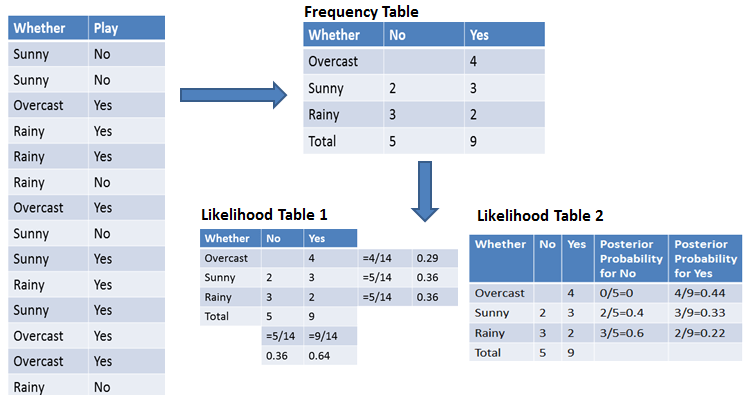

- Bayes 정리를 활용한 분류
- Frequency Table: 데이터에서의 빈도
- Likelihood Table 1: 각 Feature X 각 Label에 대한 확률
- Likelihood Table 2는 각 Feature에 대한 사후 확률

- 예: 날씨가 Overcast(흐린)
 - P(Yes|overcast) = P(overcast|Yes) * P(Yes)/P(overcast)
 1. 사전확률(Prior Probability)

    P(overcast) = 4/14 = 0.29

    P(Yes) = 9/14 = 0.64

 2. 사후 확률(posterior probability)

    P(Overcast|NO) = 0/9 = 0

 3. 베이즈 정리에 대입

    P(NO|overcast) = P(overcast|NO) * (P(No) / P(overcast)) = 0*(0.36 / 0.29) = 0

 - P(Yes|Overcast) = 1, P(No|Overcast) = 0
 - 날씨가 Overcast일 때 축구를 하는 확률은 0, 축구를 하지 않을 확률은 1
 - 두 확률을 비교한 뒤 더 높은 확률의 Label로 분류



- Feature가 2개 이상인 경우

<figure>
<img src = 'https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FYGLmm%2FbtqwIYLAj80%2FN2C1tFlYC9zNzvUKjy9tgk%2Fimg.png'>


 1. 사전 확률

    P(Yes) = 9/14 = 0.64

 2. 사후 확률

    P(Overcast|Yes) = 4/9 = 0.44

    P(Mild|Yes) = 4/9 = 0.44

 3. 베이즈 공식에 대입

    P(Weather=Overcast, Temp=Mild | Play=Yes) = P(Overcast|Yes) P(Mild|Yes) = 0.44 * 0.44 = 0.1936

    P(Paly=Yes | Weather=Overcast, Temp=Mild) = P(Weather=Overcast, Temp=Mild | Play=Yes) P(Play=Yes) / P(Weather=Overcast, Temp=Mild)= 0.1936 * 0.64 / 0.1224 = 1

- 장점

1. 간단하고, 빠르며, 정확한 모델

2. computation cost가 작음

3. 큰 데이터셋에 적합

4. 연속형보다 이산형 데이터에서 성능이 좋음, DTM?

5. Multiple class 예측을 위해서도 사용할 수 있음

- 단점: feature 간의 독립성을 가정
 - **features are conditionally independent**
 - 실제 데이터에서 모든 feature가 독립인 경우는 없기에 "Naive한 가정"


- 모형 구축

In [44]:
# Assigning features and label variables
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny',
'Rainy','Sunny','Overcast','Overcast','Rainy']
temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

In [45]:
# Import LabelEncoder
from sklearn import preprocessing

#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.|
weather_encoded=le.fit_transform(weather)
print(weather_encoded)

[2 2 0 1 1 1 0 2 2 1 2 0 0 1]


In [46]:
# Converting string labels into numbers
temp_encoded=le.fit_transform(temp)
label=le.fit_transform(play)
print("Temp:",temp_encoded)
print("Play:",label)

Temp: [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
Play: [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [47]:
import pandas as pd
features = pd.DataFrame({"temp":temp_encoded, "weather":weather_encoded})
print(features)

    temp  weather
0      1        2
1      1        2
2      1        0
3      2        1
4      0        1
5      0        1
6      0        0
7      2        2
8      0        2
9      2        1
10     2        2
11     2        0
12     1        0
13     2        1


In [48]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(features,label)

#Predict Output
predicted= model.predict([[0,2]]) # 0:Overcast, 2:Mild
print("Predicted Value:", predicted)

Predicted Value: [0]


- NB 연습(target의 범주가 3 이상)

In [49]:
#Import scikit-learn dataset library
from sklearn import datasets
wine = datasets.load_wine()

# print the names of the 13 features
print("Features: ", wine.feature_names)

# print the label type of wine(class_0, class_1, class_2)
print("Labels: ", wine.target_names)

Features:  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Labels:  ['class_0' 'class_1' 'class_2']


In [50]:
wine.data.shape

(178, 13)

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3, random_state=109)

#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9074074074074074


# 11. NB 연습


- NB의 종류
 1. GaussianNB → Feature가 연속형
 2. CategoricalNB → Feature가 범주형
 3. MultinomialNB → DTM에 활용

In [52]:
#sms.csv를 사용